# Linear Regression with Early Stopping

In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold

In [2]:
df = pd.read_csv('datasets/HousingData.csv')

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:
df_cleaned = df.dropna()
df_cleaned

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33,16.8
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9


In [5]:
X = df_cleaned.drop(columns=['MEDV'])
y = df_cleaned['MEDV']

In [6]:
X = df_cleaned.drop(columns=['MEDV'])
y = df_cleaned['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

In [7]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
15,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,4,307,21.0,395.62,8.47
468,15.57570,0.0,18.10,0.0,0.5800,5.926,71.0,2.9084,24,666,20.2,368.74,18.13
282,0.06129,20.0,3.33,1.0,0.4429,7.645,49.7,5.2119,5,216,14.9,377.07,3.01
494,0.27957,0.0,9.69,0.0,0.5850,5.926,42.6,2.3817,6,391,19.2,396.90,13.59
16,1.05393,0.0,8.14,0.0,0.5380,5.935,29.3,4.4986,4,307,21.0,386.85,6.58


In [8]:
y_train.head()

15     19.9
468    19.1
282    46.0
494    24.5
16     23.1
Name: MEDV, dtype: float64

In [9]:
mm  = MinMaxScaler()
X_train = mm.fit_transform(X_train)
X_test = mm.fit_transform(X_test)

In [10]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (315, 13)
X_test shape: (79, 13)


In [11]:
model = tf.keras.Sequential([
    tf.keras.Input(shape= (X_train.shape[1],) ),
    tf.keras.layers.Dense(units=1, activation='relu')  # Output layer with 1 neuron (for regression)
])
model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.SGD(learning_rate=1.))
monitor = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, 
        verbose=1, restore_best_weights=True)
model.fit(X_train,y_train,validation_data=(X_train,y_train),
        callbacks=[monitor],verbose=2,epochs=1000)

Epoch 1/1000
10/10 - 1s - 70ms/step - loss: 11.7387 - val_loss: 7.5089
Epoch 2/1000
10/10 - 0s - 10ms/step - loss: 6.8986 - val_loss: 6.1184
Epoch 3/1000
10/10 - 0s - 10ms/step - loss: 5.7334 - val_loss: 5.3868
Epoch 4/1000
10/10 - 0s - 12ms/step - loss: 5.1707 - val_loss: 5.5652
Epoch 5/1000
10/10 - 0s - 8ms/step - loss: 4.9907 - val_loss: 4.7784
Epoch 6/1000
10/10 - 0s - 8ms/step - loss: 4.7575 - val_loss: 4.7054
Epoch 7/1000
10/10 - 0s - 8ms/step - loss: 4.6296 - val_loss: 4.4980
Epoch 8/1000
10/10 - 0s - 10ms/step - loss: 4.5100 - val_loss: 4.3823
Epoch 9/1000
10/10 - 0s - 8ms/step - loss: 4.3683 - val_loss: 4.2702
Epoch 10/1000
10/10 - 0s - 10ms/step - loss: 4.2663 - val_loss: 4.1948
Epoch 11/1000
10/10 - 0s - 22ms/step - loss: 4.1813 - val_loss: 4.1259
Epoch 12/1000
10/10 - 0s - 39ms/step - loss: 4.0818 - val_loss: 4.0190
Epoch 13/1000
10/10 - 0s - 28ms/step - loss: 4.0281 - val_loss: 4.0325
Epoch 14/1000
10/10 - 0s - 39ms/step - loss: 3.9532 - val_loss: 3.8824
Epoch 15/1000
10/1

In [12]:
y_pred = model.predict(X_test)
loss = model.evaluate(X_test, y_test) # this will return the error metric defined in model.compile's loss option. i-e: loss='mean_absolute_error'
# Compute the R^2 score
r2 = r2_score(y_test, y_pred)
print('R2 score:', r2)
print('Loss (Mean absolute error per testing example):', loss)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.0898 
R2 score: 0.4660773265245629
Loss (Mean absolute error per testing example): 5.223752021789551


#### Plotting Predicted vs Actual Value of Linear Regression Model

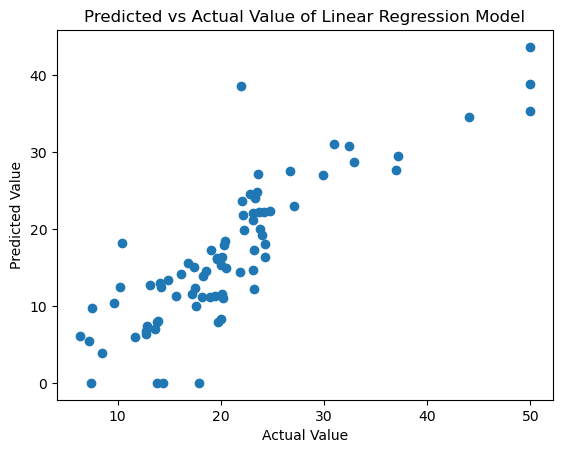

In [13]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Predicted vs Actual Value of Linear Regression Model')
plt.show()